<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Lasso_and_Ridge_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
#print(X)
print(y)
# Add some outliers
y[::5] += 3 * (0.5 - np.random.rand(4))


[ 0.2503278   0.32724358  0.45330337  0.85518766  0.59854122  0.8808989
  0.56333803  0.33096444  0.61411311  0.15139203  0.13200422 -0.10648323
 -0.26754672 -0.5341108  -0.7136234  -0.81507929 -1.02385268 -1.16611421
 -1.03123116 -0.97876031]


In [8]:
# Create polynomial features
degree = 10
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Lasso Regression (L1 regularization)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_poly, y)

# Ridge Regression (L2 regularization)
ridge_reg = Ridge(alpha=0.2)
ridge_reg.fit(X_poly, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+00, tolerance: 8.812e-04
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=0.2)

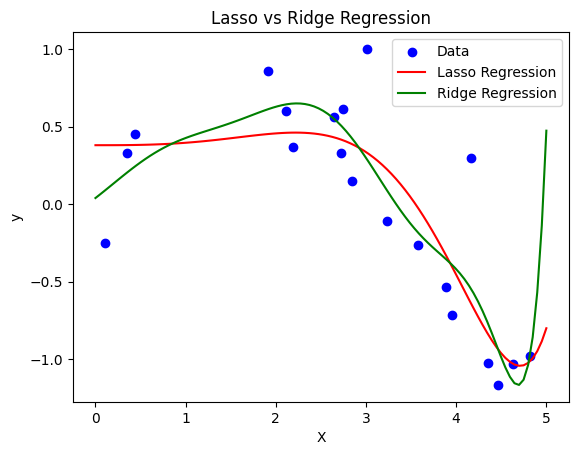

In [9]:
# Plot data
plt.scatter(X, y, color='blue', label='Data')

# Plot Lasso regression
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_lasso = lasso_reg.predict(X_test_poly)
plt.plot(X_test, y_lasso, color='red', label='Lasso Regression')

# Plot Ridge regression
y_ridge = ridge_reg.predict(X_test_poly)
plt.plot(X_test, y_ridge, color='green', label='Ridge Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso vs Ridge Regression')
plt.legend()
plt.show()


In [11]:
# Ridge Regression - norm as L2 - Sum of the squares of the coefficients
## Ridge regression adds a penalty term to the residual sum of square(RSS) to shrink the coeficients towards zero.
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

### The alpha parameter controls the strength of regularization.


Mean Squared Error: 26.985708528625263


In [12]:
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 28.390505193229057
